In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu

In [2]:
regs = np.load('sidhu_fig4a_insulin_cdrh3_her2_elisa_regressions.npz')
files = regs.files
files

['sidhu_fig4a_insulin_cdrh3_her2_elisa_rFon1',
 'sidhu_fig4a_insulin_cdrh3_her2_elisa_rFon1D',
 'sidhu_fig4a_insulin_cdrh3_her2_elisa_rFon2i1',
 'sidhu_fig4a_insulin_cdrh3_her2_elisa_Fon1',
 'sidhu_fig4a_insulin_cdrh3_her2_elisa_Fon2i1',
 'sidhu_fig4a_insulin_cdrh3_her2_elisa_Fest']

In [4]:
rFon1D = regs['sidhu_fig4a_insulin_cdrh3_her2_elisa_rFon1D']
print(rFon1D)

[[-0.48376812  1.25671115  0.80115188 -0.94047882  0.          0.        ]
 [ 0.32280773  0.49015385 -0.47055336  0.30926606  0.          0.        ]
 [ 1.30475691  1.15812854 -0.47495006 -0.57513834  0.          0.        ]
 [-0.37353846  1.4855303  -0.26930941 -0.2333399   0.          0.        ]
 [ 1.48163498  1.93202097  0.51681015 -1.42156193  0.          0.        ]
 [ 0.32521036  1.9230814  -0.09424456 -1.16397799  0.          0.        ]
 [ 0.28741379  1.24261628 -0.19486668 -0.54841469  0.          0.        ]
 [-0.02717827  0.23815385  0.43637954 -0.31388171  0.03362319  0.        ]
 [ 0.73668429  3.41058824 -0.46       -1.06903543  0.97710145  0.03362319]
 [ 1.26702725  0.43071839  2.86248756 -1.56041243  1.48434783  0.51279412]
 [ 1.64462121  2.49955882 -0.20184438 -1.46576302  1.21794118  0.85651741]
 [-0.89865633  1.98245196  0.74310606 -0.16022774  0.          1.03938462]
 [-0.45382184  2.19034826 -0.40460825 -0.12750374  3.31043478  1.03938462]
 [ 1.10901515 -0.42289855

In [5]:
col_names = ['G','R','S','Y','z','n'] #where z= ACDEFHIKLMNPQTVW (all other residues)

In [6]:
rFon1D_df = pd.DataFrame(rFon1D, index=range(19), columns=col_names)
rFon1D_df

,G,R,S,Y,z,n
0,-0.483768,1.256711,0.801152,-0.940479,0.000000,0.000000
1,0.322808,0.490154,-0.470553,0.309266,0.000000,0.000000
2,1.304757,1.158129,-0.474950,-0.575138,0.000000,0.000000
3,-0.373538,1.485530,-0.269309,-0.233340,0.000000,0.000000
4,1.481635,1.932021,0.516810,-1.421562,0.000000,0.000000
5,0.325210,1.923081,-0.094245,-1.163978,0.000000,0.000000
6,0.287414,1.242616,-0.194867,-0.548415,0.000000,0.000000
7,-0.027178,0.238154,0.436380,-0.313882,0.033623,0.000000
8,0.736684,3.410588,-0.460000,-1.069035,0.977101,0.033623
9,1.267027,0.430718,2.862488,-1.560412,1.484348,0.512794


<AxesSubplot:>

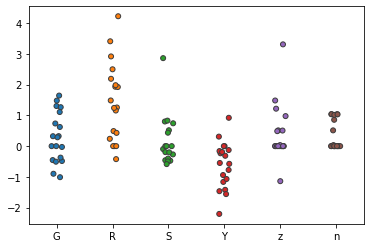

In [7]:
sns.stripplot(data=rFon1D_df, linewidth=1)

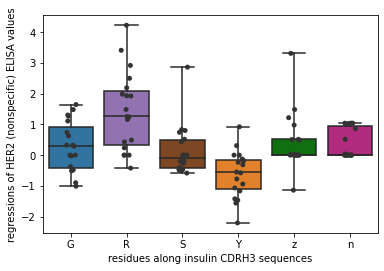

In [10]:
ortho_seqs_colors = {"G": "tab:blue", "R": "tab:purple", "S":"saddlebrown", "Y":"tab:orange", "z":"g", "n":"mediumvioletred"}
ax = sns.boxplot(data=rFon1D_df, whis=np.inf, palette=ortho_seqs_colors)
ax = sns.stripplot(data=rFon1D_df, color=".2")
plt.xlabel('residues along insulin CDRH3 sequences')
plt.ylabel('regressions of HER2 (nonspecific) ELISA values')
plt.savefig('her2_elisa_insulinseqs_rFon1D_boxplot.png', dpi=600)

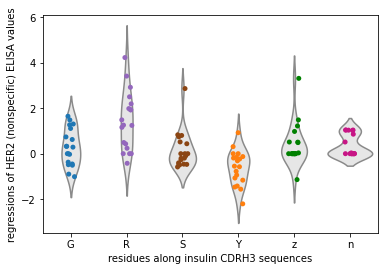

In [11]:
ax = sns.violinplot(data=rFon1D_df, inner=None, color=".9")
ax = sns.stripplot(data=rFon1D_df, palette=ortho_seqs_colors)
plt.xlabel('residues along insulin CDRH3 sequences')
plt.ylabel('regressions of HER2 (nonspecific) ELISA values')
plt.savefig('her2_elisa_insulinseqs_rFon1D_violinplot.png', dpi=600)

In [13]:
def mann_whitney_u_test(dist1, dist2):
    u_statistic, p_val = mannwhitneyu(dist1,dist2)
    return u_statistic, p_val

In [14]:
mann_whitney_u_test(list(rFon1D_df['R']), list(rFon1D_df['Y']))

(339.0, 3.877817523590672e-06)